# Задачa классификации на наборе данных Fashion-MNIST
## выполнил Фирсов М.В.

Изучены алгоритмы машиного обучения, такие как логистическая регрессия, полносвязные нейронные сети 
и сверточные нейронные сети.

## Подготовка данных

Для постоянной работы с набором данных лучше сохранить его на жестком диске.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
import matplotlib.pyplot as plt 

for dirname, _, filenames in os.walk('./fashionmnist'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./fashionmnist\fashion-mnist_test.csv
./fashionmnist\fashion-mnist_train.csv
./fashionmnist\t10k-images-idx3-ubyte
./fashionmnist\t10k-labels-idx1-ubyte
./fashionmnist\train-images-idx3-ubyte
./fashionmnist\train-labels-idx1-ubyte


In [3]:
path_train=os.path.join('./fashionmnist',"fashion-mnist_train.csv")
path_test=os.path.join('./fashionmnist',"fashion-mnist_test.csv")
print(path_train),print(path_test)
train=pd.read_csv(path_train)
test=pd.read_csv(path_test)

print("train shape: ",train.shape)
print("test shape: ",test.shape)

./fashionmnist\fashion-mnist_train.csv
./fashionmnist\fashion-mnist_test.csv
train shape:  (60000, 785)
test shape:  (10000, 785)


In [4]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]
x_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print(x_test)

      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       9       8   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0      14      53      99   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995       0       0       0       0       0       0       0       0       0   
9996       0       0       0       0       0       0       0       0       0   
9997       0       0       0       0       0       0       0       0       0   
9998       0       1       3       0       0       0       0       0       0   
9999       0       0       0       0       0       0       0     140     119   

      pixel10  ...  pixel775  pixel776 

In [7]:
print('x_train shape: ', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)
print(y_test)

x_train shape:  (60000, 784)
x_test shape : (10000, 784)
y_train shape : (60000, 1)
y_test shape : (10000, 1)
      label
0         0
1         1
2         2
3         2
4         3
...     ...
9995      0
9996      6
9997      8
9998      8
9999      1

[10000 rows x 1 columns]


## Логистическая регрессия

### *Логистическая регрессия с помощью библиотеки sklearn*

In [37]:
# normalizasyon islemi;
x_train = x_train / 255.
x_test = x_test / 255.

In [38]:
import sklearn
from sklearn.linear_model import LogisticRegression
model_regr = LogisticRegression(random_state=42, solver = 'liblinear')   #random_state=42, solver = 'liblinear'
model_regr.fit(x_train, y_train)
y_pred = model_regr.predict(x_test)

C:\Users\Mike\anaconda3\envs\coursera_ds\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [39]:
score = sklearn.metrics.classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.96      0.97      0.97      1000
           2       0.78      0.77      0.78      1000
           3       0.85      0.88      0.87      1000
           4       0.78      0.81      0.80      1000
           5       0.93      0.92      0.92      1000
           6       0.66      0.58      0.62      1000
           7       0.91      0.91      0.91      1000
           8       0.93      0.94      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.86      0.85     10000



In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('mse =  ', mse)

mse =   1.9933


In [44]:
y_pred = model_regr.predict(x_test[0:10])
predicted_label = np.array(y_pred)    #np.argmax(y_pred)
print(y_pred)
for y in y_pred:
    print(class_names[y])

[0 1 2 2 4 6 8 6 5 0]
T-shirt/top
Trouser
Pullover
Pullover
Coat
Shirt
Bag
Shirt
Sandal
T-shirt/top


In [ ]:
Точность логистической регрессии 0.86. Квадратическая ошибка 1.9449.
Необходимо для нормальной работы использовать resolver, а для воспроизводимости результатов random_state=42.

### *Логистическая регрессия с помощью библиотеки tensorflow.keras*

In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np 
import matplotlib.pyplot as plt 
print("tensorflow version is : ", tf.__version__)

tensorflow version is :  2.4.1


In [24]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]
x_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]

In [25]:
# normalizasyon islemi;
x_train = x_train / 255.
x_test = x_test / 255.

In [26]:
# hiperparametrelerim
batch_size = 128
num_classes = 10
epochs = 20
learning_rate=0.001

In [27]:
# one hot encode outputs
num_classes = 10
print("num_classes =  ", num_classes)

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('x_train shape: ', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

num_classes =   10
x_train shape:  (60000, 784)
x_test shape : (10000, 784)
y_train shape : (60000, 10)
y_test shape : (10000, 10)


Используем стохастический градиентный спуск (stochastic gradient descent) в качестве алгоритма оптимизации.

In [28]:
def logist_regr01(input_shape):
    model = tf.keras.models.Sequential()
    #model.add(tf.keras.layers.Dense(256, activation='relu',input_shape=(784,)))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD() , metrics=['accuracy'])
    return model

In [29]:
model_00 = logist_regr01((784, ))

class CustomCallback(tf.keras.callbacks.Callback):
  logs_array=[]
  def on_epoch_end(self,epoch,logs=None):
    self.logs_array.append(logs)
    
history_logist_regr01=model_00.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=CustomCallback(), verbose=0, \
validation_data=(x_test, y_test), shuffle=True)
val_loss, val_acc=model_00.evaluate(x_test, y_test )
print("validation loss: ", val_loss)
print("validation accuracy: ", val_acc)

313/313 [==============================] - 0s 814us/step - loss: 0.4978 - accuracy: 0.8381
validation loss:  0.49776381254196167
validation accuracy:  0.838100016117096


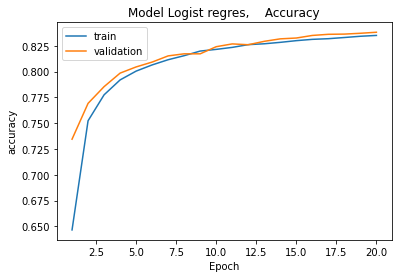

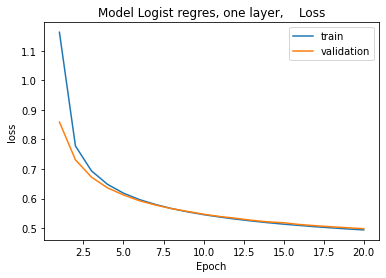

In [31]:
plt.title('Model Logist regres,    Accuracy')
plt.plot(range(1,21),history_logist_regr01.history['accuracy'])
plt.plot(range(1,21),history_logist_regr01.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Logist regres, one layer,    Loss')
plt.plot(range(1,21),history_logist_regr01.history['loss'])
plt.plot(range(1,21),history_logist_regr01.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

Вывод: Точность модели "logist_regr01" (логистической регрессии) невысокая 0,83.
Но разница между трейном и валидацией очень мала, следовательно модель логистической регрессии можно дообучить
за счет увеличения количества эпох.

## Полносвязные нейронные сети

Model "neural_network01, one layer"

In [41]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np 
import matplotlib.pyplot as plt 
print("tensorflow version is : ", tf.__version__)

tensorflow version is :  2.4.1


In [54]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]
x_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]

In [55]:
# normalizasyon islemi;
x_train = x_train / 255.
x_test = x_test / 255.

In [56]:
# hiperparametrelerim
batch_size = 128
num_classes = 10
epochs = 20
learning_rate=0.001

In [57]:
# one hot encode outputs
num_classes = 10
print("num_classes =  ", num_classes)

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('x_train shape: ', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

num_classes =   10
x_train shape:  (60000, 784)
x_test shape : (10000, 784)
y_train shape : (60000, 10)
y_test shape : (10000, 10)


In [58]:
def neural_network01(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adadelta', 
                  metrics=['accuracy'])
    return model

In [60]:
model_01 = neural_network01((784, ))
adam=tf.keras.optimizers.Adam(lr=learning_rate)
model_01.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model_01.summary()

history_network01=model_01.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, \
validation_data=(x_test, y_test), shuffle=True)
val_loss, val_acc=model_01.evaluate(x_test, y_test )
print("validation loss: ", val_loss)
print("validation accuracy: ", val_acc)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.2881 - accuracy: 0.8980: 0s - loss: 0.2979 - accuracy
validation loss:  0.288149893283844
validation accuracy:  0.8980000019073486


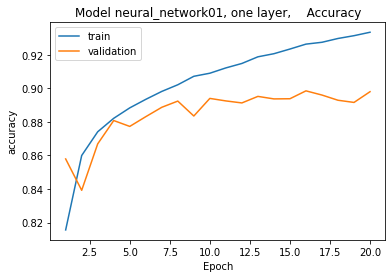

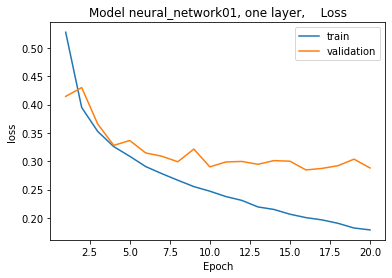

In [63]:
plt.title('Model neural_network01, one layer,    Accuracy')
plt.plot(range(1,21),history_network01.history['accuracy'])
plt.plot(range(1,21),history_network01.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model neural_network01, one layer,    Loss')
plt.plot(range(1,21),history_network01.history['loss'])
plt.plot(range(1,21),history_network01.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

In [ ]:
Вывод: Точность модели "neural_network01, one layer" из одного слоя выше,чем у логистической регрессии.

In [91]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np 
import matplotlib.pyplot as plt 

In [92]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]
x_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]

In [93]:
# normalizasyon islemi;
x_train = x_train / 255.
x_test = x_test / 255.

In [94]:
# hiperparametrelerim
batch_size = 128
num_classes = 10
epochs = 20
learning_rate=0.001

In [95]:
# one hot encode outputs
num_classes = 10
print("num_classes =  ", num_classes)

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('x_train shape: ', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

num_classes =   10
x_train shape:  (60000, 784)
x_test shape : (10000, 784)
y_train shape : (60000, 10)
y_test shape : (10000, 10)


In [96]:
def Flatten_plus_thre_dense02(input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

model_02 = Flatten_plus_thre_dense02((784, ))
adam=tf.keras.optimizers.Adam(lr=learning_rate)
model_02.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model_02.summary()

history_02=model_02.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, \
validation_data=(x_test, y_test), shuffle=True)
val_loss, val_acc=model_02.evaluate(x_test, y_test )
print("validation loss: ", val_loss)
print("validation accuracy: ", val_acc)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_16 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                170       
Total params: 6,594
Trainable params: 6,594
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8549
validation loss:  0.4213670492172241
validation accuracy:  0.8549000024795532


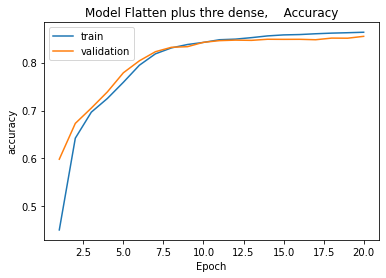

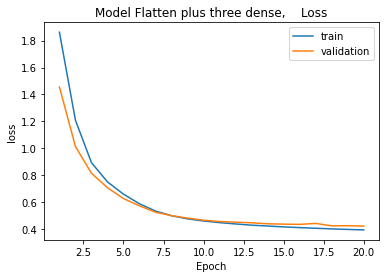

In [98]:
plt.title('Model Flatten plus thre dense,    Accuracy')
plt.plot(range(1,21),history_02.history['accuracy'])
plt.plot(range(1,21),history_02.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Flatten plus three dense,    Loss')
plt.plot(range(1,21),history_02.history['loss'])
plt.plot(range(1,21),history_02.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

Вывод: Точность модели "Flatten plus three dense" невысокая - 0.85, как у логистической регрессии. В то же время точность и ошибка  у этой модели мало отличаются при трейне и валидации (стабильны), точность увеличивается, ошибка падает, поэтому можно попробовать для увеличения точности немного дообучить модель на большем количестве эпох.

In [18]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np 
import matplotlib.pyplot as plt 

In [19]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]
x_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]

In [20]:
# normalizasyon islemi;
x_train = x_train / 255.
x_test = x_test / 255.

In [21]:
# hiperparametrelerim
batch_size = 128
num_classes = 10
epochs = 20
learning_rate=0.001

In [22]:
# one hot encode outputs
num_classes = 10
print("num_classes =  ", num_classes)

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('x_train shape: ', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

num_classes =   10
x_train shape:  (60000, 784)
x_test shape : (10000, 784)
y_train shape : (60000, 10)
y_test shape : (10000, 10)


In [23]:
print('learning rate: ', learning_rate, 'epochs : ', epochs)
def Dense4_2dropout03(input_shape):
    model = Sequential()
    model.add(Flatten(input_shape = input_shape))
    model.add(Dense(512, activation = 'tanh'))
    model.add(Dense(1024, activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation = 'softmax'))
    return model

model_03 = Dense4_2dropout03((784, ))
adam = tf.keras.optimizers.Adam(lr = learning_rate)
model_03.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_03.summary()

learning rate:  0.001 epochs :  20
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)    

In [24]:
history_03 = model_03.fit(x_train, y_train, epochs = epochs , batch_size = batch_size, verbose = 0,
                    validation_data= (x_test, y_test), shuffle = True)
val_loss, val_acc = model_03.evaluate(x_test, y_test)
print('val_loss = ', val_loss)
print('val_acc = ', val_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3193 - accuracy: 0.8888
val_loss =  0.3193267583847046
val_acc =  0.8888000249862671


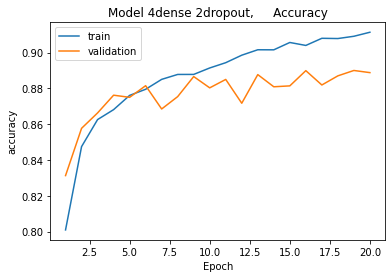

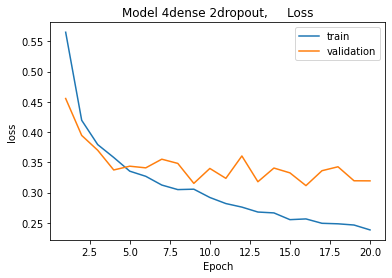

In [25]:

plt.title('Model 4dense 2dropout,     Accuracy')
plt.plot(range(1,21),history_03.history['accuracy'])
plt.plot(range(1,21),history_03.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model 4dense 2dropout,     Loss')
plt.plot(range(1,21),history_03.history['loss'])
plt.plot(range(1,21),history_03.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

Вывод: Точность модели выше других полносвязных и логистической регрессии. Однако после 6 эпох модель быстро переобучается, увеличить точность не получится. 
Для автоматизации обучения, валидации, анализа моделей и минимизации расхода ресурсов необходимо использовать инструмент "Early stopping"

## Сверточные нейронные сети

In [27]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np 
import matplotlib.pyplot as plt

In [28]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]
x_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]

In [29]:
# normalizasyon islemi;
x_train = x_train / 255.
x_test = x_test / 255.

In [30]:
# hiperparametrelerim
batch_size = 128
num_classes = 10
epochs = 20
learning_rate=0.001

In [31]:
# reshape images.
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

# one-hot encoding
num_classes = 10
print("num_classes =  ", num_classes)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
#num_classes = 10
#y_train = tf.keras.utils.to_categorical(y_train, num_classes= num_classes)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes= num_classes) 

# check shape
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

num_classes =   10
x_train shape :  (60000, 28, 28, 1)
x_test shape :  (10000, 28, 28, 1)
y_train shape :  (60000, 10)
y_test shape :  (10000, 10)


Визуализация исходных данных

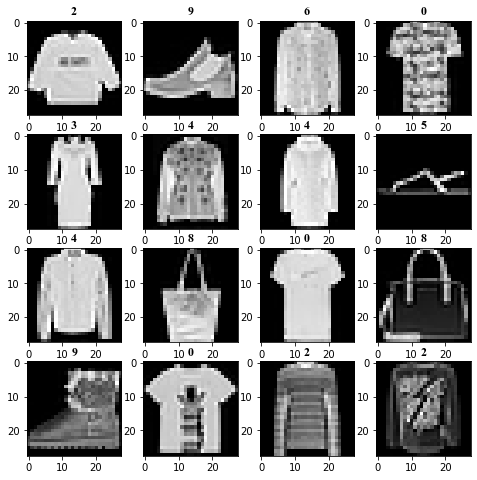

In [32]:
fig = plt.figure(figsize = (8,8))

for i in range(16):
    plt.subplot(4,4,1 + i)
    plt.title(np.argmax(y_train[i]), fontname = 'Times New Roman', fontweight = 'bold')
    plt.imshow(x_train[i,:,:,0], cmap = plt.get_cmap('gray'))

In [33]:
img_rows = 28
img_cols = 28
if K.image_data_format()== 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0],1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print (input_shape) 

(28, 28, 1)


In [34]:
def conv_net(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=input_shape, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    #model.compile(loss='categorical_crossentropy', 
                  #optimizer= 'adadelta', 
                  #metrics=['accuracy'])
    return model

In [36]:
adam=tf.keras.optimizers.Adam(lr=learning_rate)
model_04 = conv_net((28, 28, 1))
model_04.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_04.summary()

history_svertka=model_04.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, \
validation_data=(x_test, y_test), shuffle=True)
val_loss, val_acc=model_04.evaluate(x_test, y_test )
print("validation loss: ", val_loss)
print("validation accuracy: ", val_acc)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

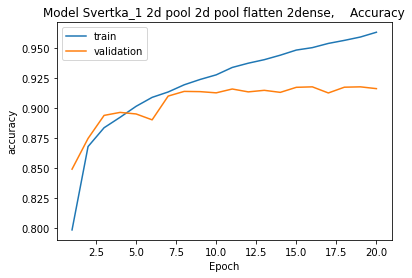

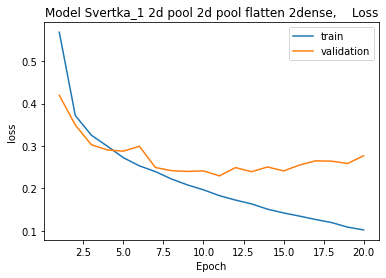

In [37]:
plt.title('Model Svertka_1 2d pool 2d pool flatten 2dense,    Accuracy')
plt.plot(range(1,21),history_svertka.history['accuracy'])
plt.plot(range(1,21),history_svertka.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Svertka_1 2d pool 2d pool flatten 2dense,    Loss')
plt.plot(range(1,21),history_svertka.history['loss'])
plt.plot(range(1,21),history_svertka.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

Вывод: У сверточной модели самая высокая точность по сравнению с полносвязными моделями и логистической регресией за счет увеличения количества слоев. 
Однако сверточная модель требует на порядок больше ресурсов для трейна и валидации по сравнению с другими моделями.
Кроме того конкретно данная модель "Svertka_1 2d pool 2d pool flatten 2dense" быстро переобучается после 6 эпох.

### *Применение Batch Normalization*

Добавим Batch Normalization слои

In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]
x_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]

In [8]:
# normalizasyon islemi;
x_train = x_train / 255.
x_test = x_test / 255.

In [9]:
# hiperparametrelerim
batch_size = 128
num_classes = 10
epochs = 20
learning_rate=0.001

In [10]:
# reshape images.
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

# one-hot encoding
num_classes = 10
print("num_classes =  ", num_classes)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
#num_classes = 10
#y_train = tf.keras.utils.to_categorical(y_train, num_classes= num_classes)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes= num_classes) 

# check shape
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

num_classes =   10
x_train shape :  (60000, 28, 28, 1)
x_test shape :  (10000, 28, 28, 1)
y_train shape :  (60000, 10)
y_test shape :  (10000, 10)


In [12]:
from tensorflow.keras.layers import BatchNormalization
def model_BatchNormaliz(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=input_shape, activation='relu'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
    model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    #model.compile(loss='categorical_crossentropy', 
                  #optimizer= 'adadelta', 
                  #metrics=['accuracy'])
    return model

In [14]:
adam=tf.keras.optimizers.Adam(lr=learning_rate)
model_05 = model_BatchNormaliz((28, 28, 1))
model_05.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_05.summary()


history_model_BatchNormaliz=model_05.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, \
verbose=0, validation_data=(x_test, y_test), shuffle=True)

val_loss, val_acc=model_05.evaluate(x_test, y_test )
print("validation loss: ", val_loss)
print("validation accuracy: ", val_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

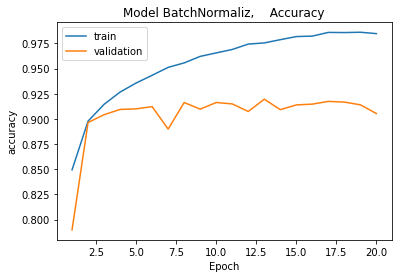

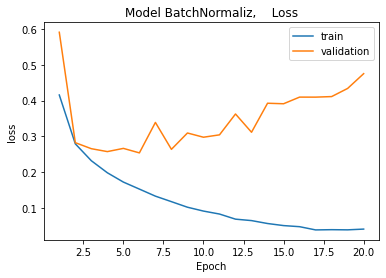

In [15]:
plt.title('Model BatchNormaliz,    Accuracy')
plt.plot(range(1,21),history_model_BatchNormaliz.history['accuracy'])
plt.plot(range(1,21),history_model_BatchNormaliz.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model BatchNormaliz,    Loss')
plt.plot(range(1,21),history_model_BatchNormaliz.history['loss'])
plt.plot(range(1,21),history_model_BatchNormaliz.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

вывод: После добавления слоев Batch Normalization точность модели даже немного уменьшилась. 
Высокая точность при Batch Normalization достигается уже при 3-х эпохах по сравнению с 6 эпохами без нею и
дальше не увеличивется.
Batch Normalization применяется для ускорения обучения и соответственно экономии ресурсов при приемлемом 
снижении уровня точности.

## Визуализация результатов

In [207]:
pred_y = model_04.predict(x_test)

In [201]:
y_pred = model_04.predict(x_test[0:10])
predicted_label = np.array(y_pred)    #np.argmax(y_pred)
print(predicted_label)
#print(y_pred)
for y in y_pred:
    #print(class_names[y])
    print(np.argmax(y))

[[9.99968767e-01 2.99800212e-10 5.51933397e-07 1.18566850e-05
  9.82244728e-07 1.35335062e-14 1.78963182e-05 1.37591196e-17
  1.58348423e-09 4.25528550e-14]
 [1.80807803e-07 9.99999046e-01 1.19713739e-10 7.59523743e-07
  9.49171941e-09 3.05757295e-15 1.60774435e-10 5.77961073e-15
  4.73485834e-11 1.13100007e-13]
 [7.97613116e-04 3.40014961e-11 9.65455890e-01 3.01672135e-05
  9.90074454e-07 1.14605577e-13 3.37152556e-02 2.18087145e-17
  1.12809595e-10 1.38440008e-12]
 [1.47897590e-04 5.61190024e-03 3.62902647e-04 1.28347844e-01
  8.25985491e-01 7.02066985e-13 3.81332189e-02 3.09679040e-12
  1.41077838e-03 1.91327709e-09]
 [4.51684937e-05 1.16136164e-06 4.12414993e-05 9.98800993e-01
  1.04769052e-03 8.03598887e-13 2.41124649e-08 3.70395663e-13
  6.37771154e-05 1.54554469e-09]
 [6.28585219e-02 2.25877329e-07 5.88314012e-02 4.16640134e-04
  2.14095107e-05 7.28145738e-11 8.77666116e-01 9.36174228e-12
  2.05716322e-04 7.68667491e-11]
 [2.15598611e-05 2.31871731e-04 7.99360278e-05 5.24679876e

In [209]:
for i in range(10):
    predictions_array = y_pred[i]

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(y_test[i])
    print('predicted_label =', predicted_label)
    print('true_label =  ', true_label)

predicted_label = 0
true_label =   0
predicted_label = 1
true_label =   1
predicted_label = 2
true_label =   2
predicted_label = 4
true_label =   2
predicted_label = 3
true_label =   3
predicted_label = 6
true_label =   2
predicted_label = 8
true_label =   8
predicted_label = 6
true_label =   6
predicted_label = 5
true_label =   5
predicted_label = 0
true_label =   0


In [223]:
def plot_image(i, predictions_array, true_label, img):
    #predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array[i])     
    true_label = np.argmax(true_label[i])    #array_int = np.array(codespeedy_float_list, dtype='int')
    #true_label.astype(np.int32)  
    true_label = true_label.item()   
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
    100*np.max(predictions_array),
    class_names[true_label]),
    color=color)

def plot_value_array(i, predictions_array, true_label):
        
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[i], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array[i])
    true_label = np.argmax(true_label[i])    #array_int = np.array(codespeedy_float_list, dtype='int')
    true_label.astype(np.int32) 

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

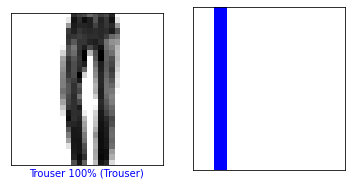

In [224]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred, y_test)

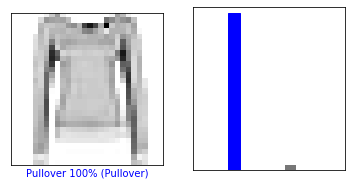

In [225]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred, y_test)

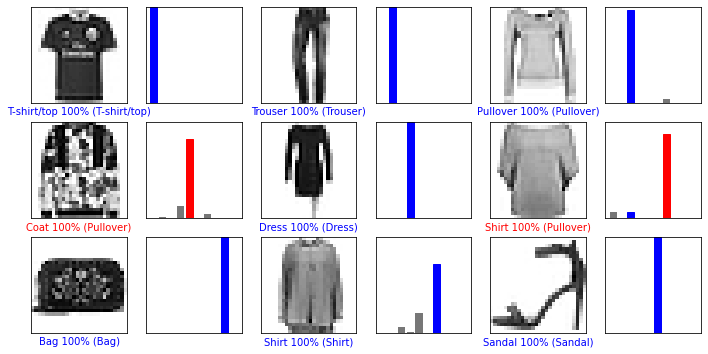

In [227]:
# Сделаем график первых X тестовых изображений, их прогнозируемые метки и действительная метка
# Окрасим правильные прогнозы синим, а неправильные - красным
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_pred, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_pred, y_test)

Синим цветом отмечены правильные, а красным - неправильные предсказания.